In [1]:
#WorkFlow 
'''
1)Removed pet_id issue_data and listing_date as they are not worth it and no feature preprocessing can make them useful
2)As color_type is a conditional feature making it label encoder
3)As only condition consist of Nan values we can use a model to get the values
4)Dropping highly correlated features
5)Then finally using a model to predict the final output
'''

'\n1)Removed pet_id issue_data and listing_date as they are not worth it and no feature preprocessing can make them useful\n2)As color_type is a conditional feature making it label encoder\n3)As only condition consist of Nan values we can use a model to get the values\n4)Dropping highly correlated features\n5)Then finally using a model to predict the final output\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from datetime import datetime

In [3]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
from sklearn.impute import KNNImputer,SimpleImputer

In [5]:
data=pd.read_csv('train.csv')

In [6]:
test=pd.read_csv('test.csv')

# Now lets explore the training data we will not touch the testing data

In [7]:
data.tail()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2
18833,ANSL_73558,2011-12-13 00:00:00,2018-10-26 14:18:00,0.0,Brown,0.86,37.40,0,1,1.0,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


# From above info we get to know that condition has some missing values

In [9]:
data.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


# Checking the missing values graphically

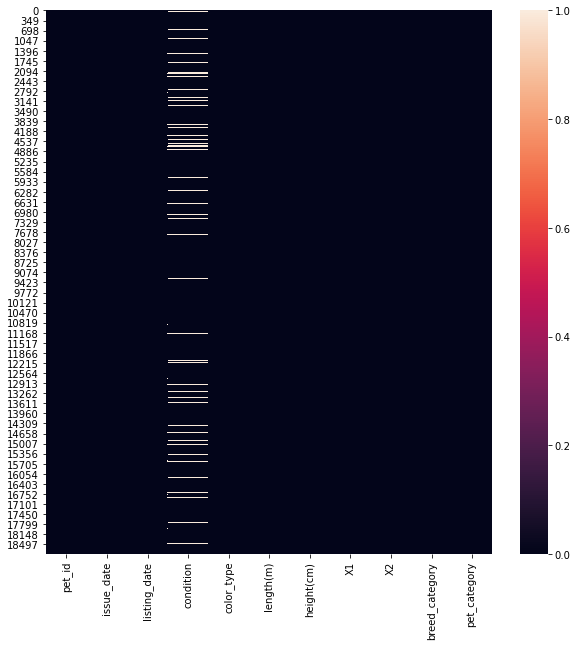

In [10]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())

In [11]:
#Now checking whether condition a categorical feature or continous feature

In [12]:
data['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [13]:
#This shows that the condition feature is a categorical feature and hence we can impute them.

In [14]:
#But we will impute after splitting the data 
#For first phase we will just go with simple train_test_split

In [15]:
X=data.drop(['breed_category','pet_category'],axis=1)
y=data[['breed_category','pet_category']]

In [16]:
X.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2'],
      dtype='object')

In [17]:
y.columns #Target variables

Index(['breed_category', 'pet_category'], dtype='object')

In [18]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
#Now we have different 

In [20]:
train=X_train

In [21]:
train['breed_category']=y['breed_category']
train['pet_category']=y['pet_category']

/home/utkarsh/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/utkarsh/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
train.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)

/home/utkarsh/anaconda3/envs/deeplearning/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder=LabelEncoder()
train['color_type']=encoder.fit_transform(train['color_type'])

/home/utkarsh/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
7362,1.0,2,0.73,16.96,0,1,0.0,2
9813,0.0,2,0.83,33.96,0,1,1.0,2
14596,NaN,2,0.22,38.92,0,3,2.0,4
8206,2.0,53,0.94,20.84,0,7,0.0,2
5148,2.0,2,0.06,34.82,0,7,1.0,2


In [26]:
impute_train=train[['condition','color_type','length(m)','height(cm)','X1','X2']]

In [27]:
from sklearn.impute import KNNImputer

In [28]:
imp=KNNImputer()

In [29]:
impute_train=imp.fit_transform(impute_train)

In [30]:
train_data=pd.DataFrame(columns=['condition','color_type','length(m)','height(cm)','X1','X2'],data=impute_train)

In [31]:
train_data

,condition,color_type,length(m),height(cm),X1,X2
0,1.0,2.0,0.73,16.96,0.0,1.0
1,0.0,2.0,0.83,33.96,0.0,1.0
2,1.0,2.0,0.22,38.92,0.0,3.0
3,2.0,53.0,0.94,20.84,0.0,7.0
4,2.0,2.0,0.06,34.82,0.0,7.0
...,...,...,...,...,...,...
15062,2.0,40.0,0.14,12.21,18.0,4.0
15063,0.0,38.0,0.78,23.05,0.0,1.0
15064,2.0,12.0,0.94,31.45,13.0,9.0
15065,0.0,15.0,0.08,35.33,7.0,1.0


In [32]:
#Now we have imputed the missing values of condition table

In [33]:
train.drop('condition',axis=1,inplace=True)
train['conditon']=train_data['condition']


/home/utkarsh/anaconda3/envs/deeplearning/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/utkarsh/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


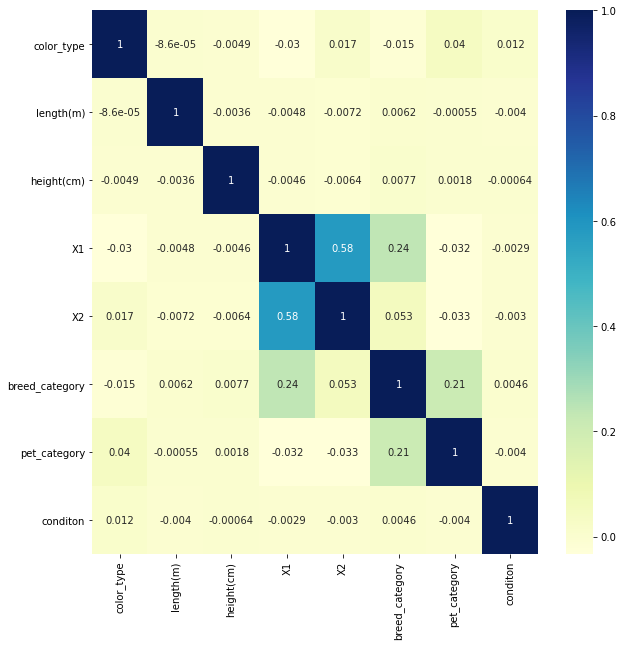

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')

In [35]:
X=train_data
y=train[['breed_category','pet_category']]

In [36]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf=DecisionTreeClassifier(random_state=0)

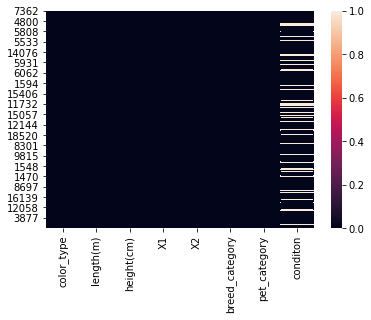

In [39]:
sns.heatmap(train.isnull())

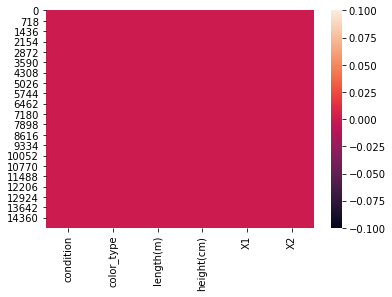

In [40]:
sns.heatmap(train_data.isnull())

In [41]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
predict=clf.predict(X_val)

In [43]:
predict

array([[0., 2.],
       [1., 1.],
       [1., 2.],
       ...,
       [1., 1.],
       [1., 2.],
       [1., 1.]])

In [44]:
from sklearn.metrics import classification_report

In [45]:
score=pd.DataFrame(data=predict,columns=['1','2'])

In [46]:
print(classification_report(y_val['breed_category'],score['1']),classification_report(y_val['pet_category'],score['2']))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1449
         1.0       0.89      0.89      0.89      1339
         2.0       0.86      0.90      0.88       226

    accuracy                           0.89      3014
   macro avg       0.88      0.89      0.89      3014
weighted avg       0.89      0.89      0.89      3014
               precision    recall  f1-score   support

           0       0.17      0.18      0.17        11
           1       0.77      0.80      0.78      1139
           2       0.85      0.84      0.84      1717
           4       0.71      0.69      0.70       147

    accuracy                           0.81      3014
   macro avg       0.63      0.63      0.63      3014
weighted avg       0.81      0.81      0.81      3014



In [47]:
#Now putting above steps in testing data

In [48]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [49]:
save=test['pet_id']
test.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)

In [50]:
test['color_type']=encoder.transform(test['color_type'])

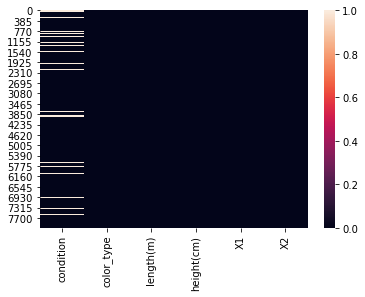

In [51]:
sns.heatmap(test.isnull())

In [52]:
test_data=imp.transform(test)

In [53]:
pred=clf.predict(test_data)

In [54]:
score=pd.DataFrame()
da=pd.DataFrame(data=pred,columns=['0','1'])

In [55]:
score['pet_id']=save
score['breed_category']=da['0']
score['pet_category']=da['1']

In [56]:
score.to_csv('submission.csv',index=False)

In [57]:
conda install xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [58]:
conda install -c conda-forge xgboost


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [59]:
import xgboost

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
tfc=RandomForestClassifier(random_state=0)

In [65]:
tfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [71]:
predict=tfc.predict(X_val)

In [72]:
score=pd.DataFrame(data=predict,columns=['1','2'])
print(classification_report(y_val['breed_category'],score['1']),classification_report(y_val['pet_category'],score['2']))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1449
         1.0       0.89      0.88      0.89      1339
         2.0       0.97      0.90      0.93       226

    accuracy                           0.89      3014
   macro avg       0.91      0.89      0.90      3014
weighted avg       0.89      0.89      0.89      3014
               precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.78      0.78      0.78      1139
           2       0.84      0.86      0.85      1717
           4       0.87      0.71      0.78       147

    accuracy                           0.82      3014
   macro avg       0.72      0.63      0.67      3014
weighted avg       0.82      0.82      0.82      3014



In [73]:
import xgboost

In [74]:
from xgboost import XGBClassifier

In [78]:
xg=XGBClassifier()
xg2=XGBClassifier()

In [79]:
xg.fit(X_train,y_train['breed_category'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xg2.fit(X_train,y_train['pet_category'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
pred_breed=xg.predict(X_val)

In [84]:
pred_pet=xg2.predict(X_val)

In [85]:
print(classification_report(y_val['breed_category'],pred_breed),classification_report(y_val['pet_category'],pred_pet))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1449
         1.0       0.89      0.88      0.89      1339
         2.0       1.00      0.91      0.95       226

    accuracy                           0.89      3014
   macro avg       0.92      0.90      0.91      3014
weighted avg       0.90      0.89      0.89      3014
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.78      0.83      1139
           2       0.86      0.93      0.89      1717
           4       0.88      0.71      0.79       147

    accuracy                           0.86      3014
   macro avg       0.65      0.61      0.63      3014
weighted avg       0.86      0.86      0.86      3014



In [86]:
score1=xg.predict(test)

In [87]:
score2=xg2.predict(test)

In [88]:
ans=pd.DataFrame()

In [89]:
ans['pet_id']=save

In [90]:
ans['breed_category']=score1
ans['pet_category']=score2

In [91]:
ans.to_csv("solution2.csv",index=False)